In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go 
import plotly.offline as py
from plotly.subplots import make_subplots

In [ ]:
url = 'https://raw.githubusercontent.com/ray-anuska/Data-Analysis/master/diabetes.csv?token=GHSAT0AAAAAAB33426FJECQ33M6UNBLXI2QY5PAYDQ'
df = pd.read_csv(url)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.shape

(768, 9)

In [ ]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

This tells us that there are no null values in the dataset. But this does not necessarily mean it is a very clean dataset. If we see the description then it can be observed that for some columns the minimum is 0. Now, Pregnancies can be zero realistically but BloodPressure can never be zero for a person. Same is true for Insulin, BMI, Glucose and Skin Thickness suggesting that the zeroes here are the null values, having been placed to fill up the spaces that were empty. 


Therefore, to make things clearer, it is best to replace those zeros with NaN.

In [ ]:
df_copy = df.copy(deep = True)
df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']] = df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']].replace(0, np.NaN)

print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


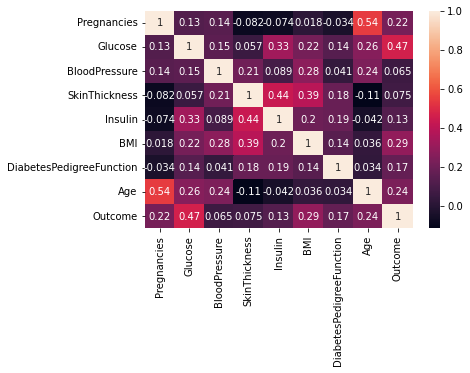

In [ ]:
correlation = df.corr() 
sns.heatmap(correlation, xticklabels = correlation.columns, yticklabels = correlation.columns, annot = True)

In [ ]:
#data = df_copy.drop(['BloodPressure', 'SkinThickness'], axis = 1)

In [ ]:
#df_copy.hist(figsize = (15, 15))

In [ ]:
def plotting(data) : 
  columns = data.columns
  fig = make_subplots(rows=3, cols=3, subplot_titles=columns)

  r = 1 ;
  c = 1 ;
  for clm in columns : 
    fig.add_trace(
        go.Histogram(x = data[clm], nbinsx = 15),
        row=r, col=c
    )
    c = c + 1
    if(c > 3):
      r = r + 1
      c = 1

  fig.update_layout(height=1000, width=1200, title_text="Subplots")
  fig.update_traces(opacity = 0.75)
  fig.show()

In [ ]:
plotting(df_copy)

Looking at the distribution of data, it is safe to fill the missing values with the mean values of the distribution.

In [ ]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)

In [ ]:
plotting(df_copy)

Replacing the missing values has not changed the distribution much  

In [ ]:
#sns.pairplot(df)

Now we look at the relationship of each variable with the outcome. Before that we analyse the Outcome itself

In [ ]:
fig = px.histogram(df_copy['Outcome'], nbins = 3)
fig.update_layout(height=400, width=600)
fig.update_traces(opacity = 0.65)

From the above bar plot it can be seen 500 people in the dataset are non-diabetic and 268 are diabetic. 

In [ ]:
fig = px.histogram(df_copy['BloodPressure'], nbins = 10, color = df["Outcome"])
fig.update_layout(height=400, width=600)
fig.update_traces(opacity = 0.65)